In [1]:
# Data Handling
import csv
import pandas as pd

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# System Information
import platform

# Numeric Computation and Array Handling
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Print Python version
print("Python Version:", platform.python_version())

Python Version: 3.11.7


In [4]:
# Specifiy CSV file path
file_path = r'C:\Users\kolgi\OneDrive - Western Governors University\D212\medical_clean.csv'

# Open the CSV file and read it using DictReader
with open(file_path, 'r') as csvfile:
    csvreader = csv.DictReader(csvfile)

# Read the CSV file into a pandas DataFrame then open head
df = pd.read_csv(file_path)

In [5]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [7]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [8]:
# Find missing values
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [9]:
# Find duplicates
# Check for duplicate rows
duplicates = df.duplicated()

# Display duplicate rows
print("Duplicate rows:")
print(df[duplicates])

Duplicate rows:
Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, Population, Area, TimeZone, Job, Children, Age, Income, Marital, Gender, ReAdmis, VitD_levels, Doc_visits, Full_meals_eaten, vitD_supp, Soft_drink, Initial_admin, HighBlood, Stroke, Complication_risk, Overweight, Arthritis, Diabetes, Hyperlipidemia, BackPain, Anxiety, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services, Initial_days, TotalCharge, Additional_charges, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8]
Index: []

[0 rows x 50 columns]


In [10]:
# Create a new DataFrame with just continous variables
new_df = df[['Lat', 'Lng', 'VitD_levels', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Income']].copy()

# Display the new DataFrame
print(new_df)

           Lat        Lng  VitD_levels  Initial_days  TotalCharge  \
0     34.34960  -86.72508    19.141466     10.585770  3726.702860   
1     30.84513  -85.22907    18.940352     15.129562  4193.190458   
2     43.54321  -96.63772    18.057507      4.772177  2434.234222   
3     43.89744  -93.51479    16.576858      1.714879  2127.830423   
4     37.59894  -76.88958    17.439069      1.254807  2113.073274   
...        ...        ...          ...           ...          ...   
9995  36.42886  -78.23716    16.980860     51.561220  6850.942000   
9996  39.43609  -74.87302    18.177020     68.668240  7741.690000   
9997  36.36655  -87.29988    17.129070     70.154180  8276.481000   
9998  44.10354 -102.01590    19.910430     63.356900  7644.483000   
9999  40.49998  -80.19959    18.388620     70.850590  7887.553000   

      Additional_charges    Income  
0           17939.403420  86575.93  
1           17612.998120  46805.99  
2           17505.192460  14370.14  
3           12993.43735

In [11]:
new_df.describe()

,Lat,Lng,VitD_levels,Initial_days,TotalCharge,Additional_charges,Income
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.751099,-91.243080,17.964262,34.455299,5312.172769,12934.528587,40490.495160
std,5.403085,15.205998,2.017231,26.309341,2180.393838,6542.601544,28521.153293
min,17.967190,-174.209700,9.806483,1.001981,1938.312067,3125.703000,154.080000
25%,35.255120,-97.352982,16.626439,7.896215,3179.374015,7986.487755,19598.775000
50%,39.419355,-88.397230,17.951122,35.836244,5213.952000,11573.977735,33768.420000
75%,42.044175,-80.438050,19.347963,61.161020,7459.699750,15626.490000,54296.402500
max,70.560990,-65.290170,26.394449,71.981490,9180.728000,30566.070000,207249.100000


In [12]:
# Calculating the correlation matrix
correlation_matrix = new_df.corr()

# Displaying the correlation matrix
correlation_matrix

,Lat,Lng,VitD_levels,Initial_days,TotalCharge,Additional_charges,Income
Lat,1.000000,-0.112348,0.001493,-0.008820,-0.010759,-0.002283,-0.019369
Lng,-0.112348,1.000000,-0.006389,-0.009292,-0.008830,0.000079,-0.006665
VitD_levels,0.001493,-0.006389,1.000000,-0.003642,-0.001403,0.008290,-0.013115
Initial_days,-0.008820,-0.009292,-0.003642,1.000000,0.987640,0.004409,-0.012465
TotalCharge,-0.010759,-0.008830,-0.001403,0.987640,1.000000,0.029256,-0.014345
Additional_charges,-0.002283,0.000079,0.008290,0.004409,0.029256,1.000000,-0.009825
Income,-0.019369,-0.006665,-0.013115,-0.012465,-0.014345,-0.009825,1.000000


In [13]:
# Call describe() method for the continous variables
description = new_df.describe()

description

,Lat,Lng,VitD_levels,Initial_days,TotalCharge,Additional_charges,Income
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.751099,-91.243080,17.964262,34.455299,5312.172769,12934.528587,40490.495160
std,5.403085,15.205998,2.017231,26.309341,2180.393838,6542.601544,28521.153293
min,17.967190,-174.209700,9.806483,1.001981,1938.312067,3125.703000,154.080000
25%,35.255120,-97.352982,16.626439,7.896215,3179.374015,7986.487755,19598.775000
50%,39.419355,-88.397230,17.951122,35.836244,5213.952000,11573.977735,33768.420000
75%,42.044175,-80.438050,19.347963,61.161020,7459.699750,15626.490000,54296.402500
max,70.560990,-65.290170,26.394449,71.981490,9180.728000,30566.070000,207249.100000


In [14]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(new_df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=new_df.columns)

# Display the standardized DataFrame
scaled_df

,Lat,Lng,VitD_levels,Initial_days,TotalCharge,Additional_charges,Income
0,-0.814668,0.297134,0.583603,-0.907310,-0.727185,0.765005,1.615914
1,-1.463305,0.395522,0.483901,-0.734595,-0.513228,0.715114,0.221443
2,0.886966,-0.354788,0.046227,-1.128292,-1.319983,0.698635,-0.915870
3,0.952530,-0.149403,-0.687811,-1.244503,-1.460517,0.009004,-0.026263
4,-0.213252,0.943984,-0.260366,-1.261991,-1.467285,-1.408991,-1.377325
...,...,...,...,...,...,...,...
9995,-0.429820,0.855358,-0.487525,0.650217,0.705765,-0.612461,0.192047
9996,0.126784,1.076607,0.105476,1.300475,1.114312,2.380307,-0.894380
9997,-0.441353,0.259332,-0.414049,1.356958,1.359597,0.358695,0.891569
9998,0.990676,-0.708494,0.964820,1.098585,1.069727,-0.787624,-0.378271


In [15]:
# Save the filtered DataFrame to a CSV file
scaled_df.to_csv('task2_scaled_df.csv', index=False)

In [16]:
# Initialize PCA
pca = PCA()

# Fit PCA to the scaled data
pca.fit(scaled_df)

# Get the loading matrix (eigenvectors)
loading_matrix = pca.components_.T

# Convert the loading matrix to a DataFrame for better visualization
loading_df = pd.DataFrame(loading_matrix, columns=scaled_df.columns)

# Display the loading matrix
loading_df

,Lat,Lng,VitD_levels,Initial_days,TotalCharge,Additional_charges,Income
0,-0.012385,0.707635,0.012997,-0.008349,-0.093509,-0.700082,0.001355
1,-0.011393,-0.698869,-0.109214,-0.088224,-0.112635,-0.692138,-0.000174
2,-0.003094,0.058388,-0.576982,-0.328228,0.744122,-0.047118,-0.001440
3,0.706503,0.000265,0.022866,-0.020951,0.009143,-0.014145,-0.706830
4,0.706831,-0.001082,0.007592,-0.000811,0.009079,-0.013292,0.707157
5,0.024252,-0.003272,-0.517683,0.854420,-0.025478,-0.020168,-0.017759
6,-0.019039,-0.086107,0.621626,0.392351,0.651181,-0.166813,0.001180


In [17]:
# Fit PCA to the scaled data and transform it
transformed_data = pca.fit_transform(scaled_df)

# Convert the transformed data array into a DataFrame for further analysis
transformed_df = pd.DataFrame(transformed_data, columns=[f'PC{i}' for i in range(1, len(scaled_df.columns) + 1)])

# Display the transformed DataFrame
transformed_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.162328,-0.891167,0.202429,1.096272,1.494848,0.074694,0.113405
1,-0.856512,-1.304697,-0.594658,0.532190,0.566968,0.693728,0.141115
2,-1.702852,0.956003,-0.943218,0.271018,-0.645076,-0.205372,-0.148216
3,-1.918832,0.741779,0.365019,0.255635,-0.626027,-0.489817,-0.151047
4,-1.943979,-0.701367,-0.122409,-1.712677,-1.165979,-0.196280,-0.122268
...,...,...,...,...,...,...,...
9995,0.936814,-0.945528,0.638958,-0.374000,-0.265916,-0.306406,0.050568
9996,1.767012,-0.588169,-1.926808,1.524060,-0.675674,-0.770908,-0.174717
9997,1.915217,-0.596786,0.614723,0.743460,0.300142,-0.044225,-0.003056
9998,1.513188,1.286798,-0.260592,-1.107707,0.498608,-0.199413,-0.006430


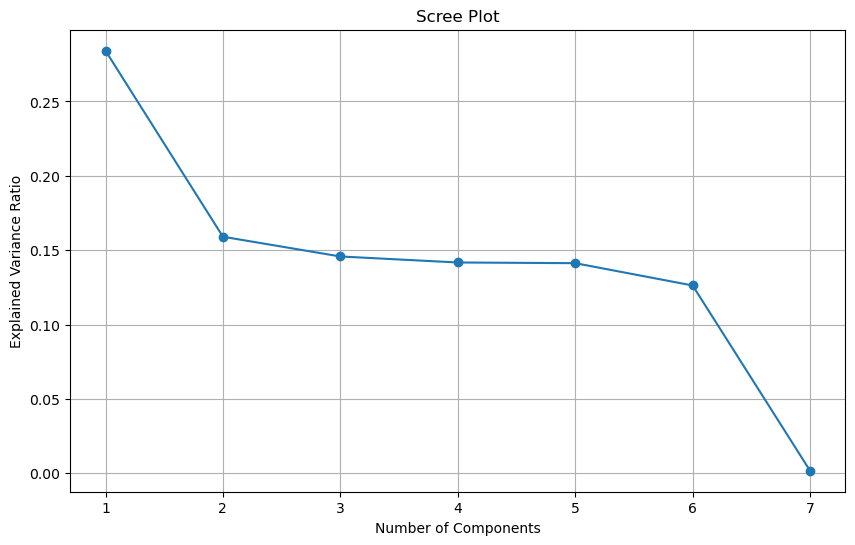

In [18]:
# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.savefig("t2_elbowmethod.png")
plt.show()

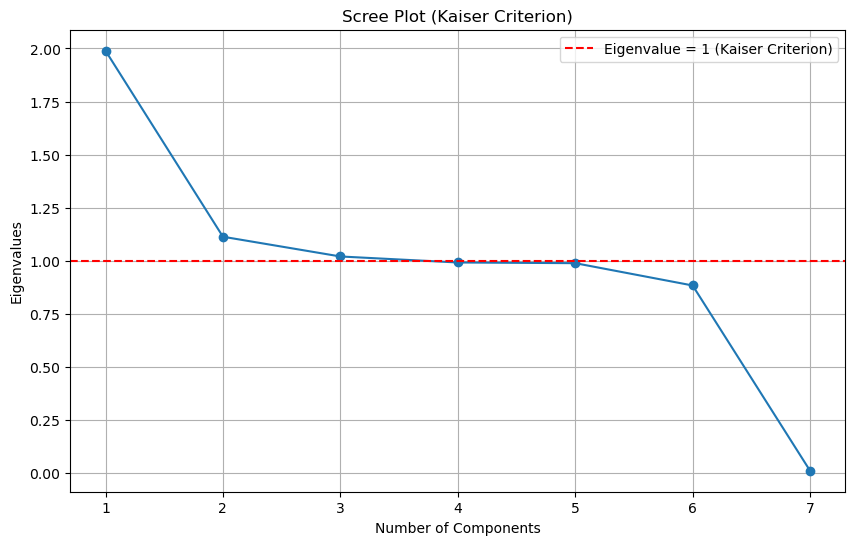

In [19]:
# Get the eigenvalues
eigenvalues = pca.explained_variance_

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.title('Scree Plot (Kaiser Criterion)')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.axhline(y=1, color='r', linestyle='--', label='Eigenvalue = 1 (Kaiser Criterion)')
plt.legend()
plt.grid(True)
plt.savefig("t2_kaiser.png")
plt.show()

In [20]:
# Initialize PCA with 3 principal components
pca_3 = PCA(n_components=3)

# Fit PCA to the scaled data and transform it
transformed_data_3 = pca_3.fit_transform(scaled_df)

# Convert the transformed data array into a DataFrame for further analysis
transformed_df_3 = pd.DataFrame(transformed_data_3, columns=['PC1', 'PC2', 'PC3'])

# Display the transformed DataFrame
print(transformed_df_3)

           PC1       PC2       PC3
0    -1.162328 -0.891167  0.202429
1    -0.856512 -1.304697 -0.594658
2    -1.702852  0.956003 -0.943218
3    -1.918832  0.741779  0.365019
4    -1.943979 -0.701367 -0.122409
...        ...       ...       ...
9995  0.936814 -0.945528  0.638958
9996  1.767012 -0.588169 -1.926808
9997  1.915217 -0.596786  0.614723
9998  1.513188  1.286798 -0.260592
9999  1.779778 -0.333509  0.429993

[10000 rows x 3 columns]


In [21]:
# Get the variance of each principal component
variance_explained_3 = pca_3.explained_variance_ratio_

# Display the variance explained by each principal component
for i, variance in enumerate(variance_explained_3):
    print(f"Variance explained by PC{i+1}: {variance:.4f}")

Variance explained by PC1: 0.2841
Variance explained by PC2: 0.1591
Variance explained by PC3: 0.1458


In [22]:
# Get the total variance explained by all principal components
total_variance_3 = np.sum(variance_explained_3)

print("Total variance explained by all principal components:", total_variance_3)

Total variance explained by all principal components: 0.5889792932999444


In [23]:
# Initialize PCA with 4 principal components
pca_4 = PCA(n_components=4)

# Fit PCA to the scaled data and transform it
transformed_data_4 = pca_4.fit_transform(scaled_df)

# Convert the transformed data array into a DataFrame for further analysis
transformed_df_4 = pd.DataFrame(transformed_data_4, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Display the transformed DataFrame
print(transformed_df_4)

           PC1       PC2       PC3       PC4
0    -1.162328 -0.891167  0.202429  1.096272
1    -0.856512 -1.304697 -0.594658  0.532190
2    -1.702852  0.956003 -0.943218  0.271018
3    -1.918832  0.741779  0.365019  0.255635
4    -1.943979 -0.701367 -0.122409 -1.712677
...        ...       ...       ...       ...
9995  0.936814 -0.945528  0.638958 -0.374000
9996  1.767012 -0.588169 -1.926808  1.524060
9997  1.915217 -0.596786  0.614723  0.743460
9998  1.513188  1.286798 -0.260592 -1.107707
9999  1.779778 -0.333509  0.429993 -0.029121

[10000 rows x 4 columns]


In [24]:
# Get the variance of each principal component
variance_explained_4 = pca_4.explained_variance_ratio_

# Display the variance explained by each principal component
for i, variance in enumerate(variance_explained_4):
    print(f"Variance explained by PC{i+1}: {variance:.4f}")

Variance explained by PC1: 0.2841
Variance explained by PC2: 0.1591
Variance explained by PC3: 0.1458
Variance explained by PC4: 0.1417


In [25]:
# Get the total variance explained by all principal components
total_variance_4 = np.sum(variance_explained_4)

print("Total variance explained by all principal components:", total_variance_4)

Total variance explained by all principal components: 0.7307195715387498
